# 데이터불러오기

In [1]:
# 현재 작업 경롤르 얻는 함수
import os
print(os.getcwd())

c:\Users\tjxog\OneDrive\바탕 화면\데이콘\타이타닉


In [28]:
import pandas as pd

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/submission.csv")

In [29]:
train.shape, test.shape


((891, 12), (418, 11))

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
test.info() # train data에서 Survived 변수만 제외됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
#상관분석
train.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


In [34]:
# 'Sex' 변수에서 남자는 0
train['Sex'] = train['Sex'].replace('male', 0) 
test['Sex'] = test['Sex'].replace('male', 0) 

In [35]:
# 'Sex' 변수에서 여자는 1
train['Sex'] = train['Sex'].replace('female', 1)
test['Sex'] = test['Sex'].replace('female', 1)

In [36]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
# 결측치 확인
train.isnull().sum()

# Age -> 없는 행은 삭제
# Cabin -> 독립변수로 쓰지 않아, 별다른 전처리는 하지 않음
# Embarked -> S,C,Q를 범주형으로 변환(Embarked에 존재하는 2개의 null 값은 제거)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
# Embarked에서 null 값을 가진 행은 제거
train2 = train.dropna(subset=['Embarked']) 
train.shape, train2.shape


((891, 12), (889, 12))

In [55]:
train2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S


In [62]:
import copy
train2 = train2.copy() # 깊은복사

# Embarked -> S,C,Q를 범주형으로 변환
train2.loc[train2['Embarked']=='C', 'Embarked'] = 0 
train2.loc[train2['Embarked']=='Q', 'Embarked'] = 1
train2.loc[train2['Embarked']=='S', 'Embarked'] = 2

In [65]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 86.8+ KB


In [67]:
# 'Embarked' 타입을 object -> int로 변환
train2['Embarked'] = train2['Embarked'].astype(int)

In [73]:
# 특정 변수('Embarked')와 나머지 변수간의 상관계수 계산
train2.corrwith(train2['Embarked']).round(2)

# Embarked와 Fare의 상관계수가 가장 높음(-0.23)

PassengerId    0.01
Survived      -0.17
Pclass         0.16
Sex           -0.11
Age           -0.03
SibSp          0.07
Parch          0.04
Fare          -0.23
Embarked       1.00
dtype: float64

In [77]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [83]:
train[train['Fare'] == 80.0] # Fare 변수가 80.0인 데이터의 Survived(1), Pclass(1)을 파악

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [81]:
# Pclass가 1인 데이터 중, Embarked의 값을 카운트
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [82]:
# Survived가 1인 데이터(생존) 중, Embarked의 값을 카운트
train[train['Survived']==1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [85]:
# Survived(1), Pclass(1)을 파악한 결과 Embarked 의값이 S가 많았음.
train['Embarked'] = train['Embarked'].fillna("S") # Embarked의 null 값을 S로 대체

In [86]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [235]:
# train 데이터의 Embarked 변수를 범주형으로 변환
train.loc[train.Embarked == 'C','Embarked'] = 0
train.loc[train.Embarked == 'Q', 'Embarked'] = 1
train.loc[train.Embarked == 'S', 'Embarked'] = 2

In [236]:
# test 데이터의 Embarked 변수를 범주형으로 변환
test.loc[test.Embarked == 'C','Embarked'] = 0
test.loc[test.Embarked == 'Q', 'Embarked'] = 1
test.loc[test.Embarked == 'S', 'Embarked'] = 2

In [237]:
train['Embarked']=train['Embarked'].astype('Int64') # object -> int64 타입으로 변환
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    Int64  
 12  Fare2        891 non-null    float64
dtypes: Int64(1), float64(3), int64(6), object(3)
memory usage: 91.5+ KB


In [238]:
# 상관분석
train.corr().round(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare2
PassengerId,1.00,-0.01,-0.04,-0.04,0.04,-0.06,-0.00,0.01,0.01,0.01
Survived,-0.01,1.00,-0.34,0.54,-0.08,-0.04,0.08,0.26,-0.17,0.26
Pclass,-0.04,-0.34,1.00,-0.13,-0.37,0.08,0.02,-0.55,0.16,-0.55
Sex,-0.04,0.54,-0.13,1.00,-0.09,0.11,0.25,0.18,-0.11,0.18
Age,0.04,-0.08,-0.37,-0.09,1.00,-0.31,-0.19,0.10,-0.03,0.10
SibSp,-0.06,-0.04,0.08,0.11,-0.31,1.00,0.41,0.16,0.07,0.16
Parch,-0.00,0.08,0.02,0.25,-0.19,0.41,1.00,0.22,0.04,0.22
Fare,0.01,0.26,-0.55,0.18,0.10,0.16,0.22,1.00,-0.22,1.00
Embarked,0.01,-0.17,0.16,-0.11,-0.03,0.07,0.04,-0.22,1.00,-0.22
Fare2,0.01,0.26,-0.55,0.18,0.10,0.16,0.22,1.00,-0.22,1.00


In [239]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Fare2            0
dtype: int64

In [240]:
test[test['Fare'].isnull()] 
# Fare 변수와 Pclass열의 상관관계가 높으므로, Pclass가 3인 행들의 Fare열의 분포를 살펴봄.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2


In [241]:
fare = pd.DataFrame(test[test['Pclass']==3]['Fare'].value_counts().nlargest(12))
# Pclass가 3인 Fare 변수 값의 빈도수를 계산. 이때, 계산한 빈도수 중에서 가장 큰 12개의 값을 선택.
fare = fare.reset_index() # 새로운 인덱스를 생성, 기존 열은 index 열로 이동함.
fare

,index,Fare
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2292,9
5,7.2250,9
6,7.8542,8
7,8.6625,8
8,7.8792,6
9,7.2500,5


In [242]:
fare['index'].mean()

8.395141666666667

In [243]:
# Fare의 결측치를 가장 많은 Fare 값의 빈도수로 채움.
test['Fare'] = test['Fare'].fillna("7.753825")

In [244]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Fare2            0
dtype: int64

# 정규화와 표준화
###### 정규화: -1 ~ 1 사이의 값으로 변환
###### 표준화: 평균이 0이고 표준편차가 1인 값으로 변환

In [245]:
# Min-Max Scaling
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

# Standardization
def standardscaler(x):
    return (x-x.mean())/x.std()


In [246]:
#패키지를 이용한 정규화 및 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # StandardScaler 클래스의 인스턴스 생성.
ss.fit(train[['Fare']]) # Fare에 대한 통계적 정보(평균, 표준편차)를 계산함.
train_fare = ss.transform(train[['Fare']])  # train의 'Fair' 변수를 표준화한 새로운 배열로 변환
test_fare = ss.transform(test[['Fare']]) # test의 'Fair' 변수를 표준화한 새로운 배열로 변환



In [247]:
train['Fare2'] = train_fare
test['Fare2'] = test_fare

In [248]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.488854


In [290]:
# 필요한 변수만 독립변수로 가져옴.
data = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare2', 'Survived']]

X_train = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare2']]
Y_train = train[['Survived']]
X_test = test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare2']]


# 모델링
###### 독립변수: Pclass, Sex, SibSp, Parch, Embarked, Fare2
###### 종속변수: Survived

In [291]:
train.std() # Age는 편차가 너무 크고, null 값이 많기 때문에, 독립변수에서 제외함.

C:\Users\tjxog\AppData\Local\Temp\ipykernel_14268\2053093695.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.std() # Age는 편차가 너무 크고, null 값이 많기 때문에, 독립변수에서 제외함.


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Sex              0.477990
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
Embarked         0.791503
Fare2            1.000562
dtype: float64

In [292]:
train['Age'].min(), train['Age'].max()
# 나이가 최소 0살 ~ 80살 까지 존재함.


(0.42, 80.0)

<AxesSubplot:>

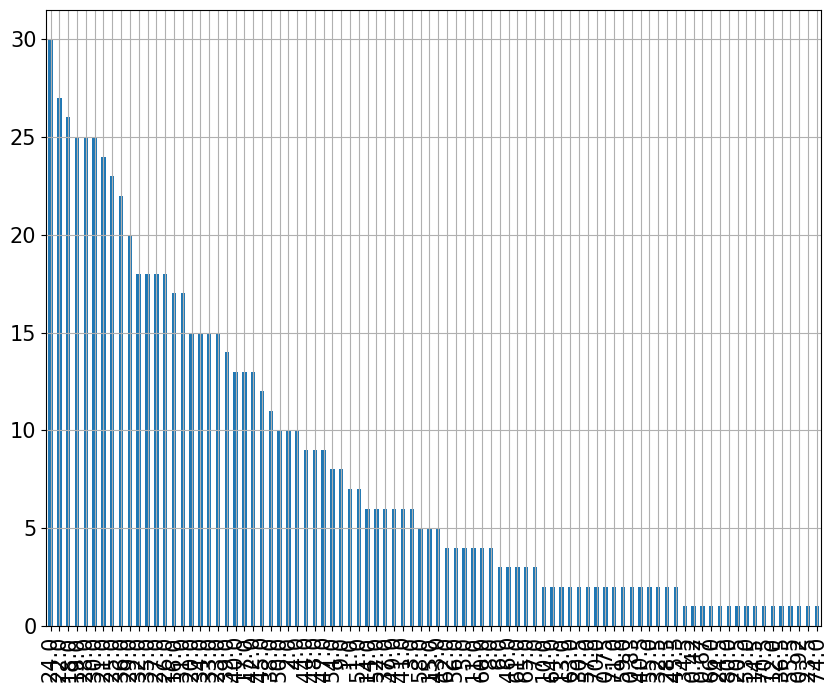

In [293]:
# Age의 분포를 시각화
CountStatus = pd.value_counts(train['Age'].values, sort =True) # Age 열의 값을 카운트하여 CountStatus 변수에 저장
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '35.0'),
  Text(1, 0, '22.0'),
  Text(2, 0, '38.0'),
  Text(3, 0, '26.0'),
  Text(4, 0, '54.0'),
  Text(5, 0, '2.0'),
  Text(6, 0, '27.0'),
  Text(7, 0, '14.0')])

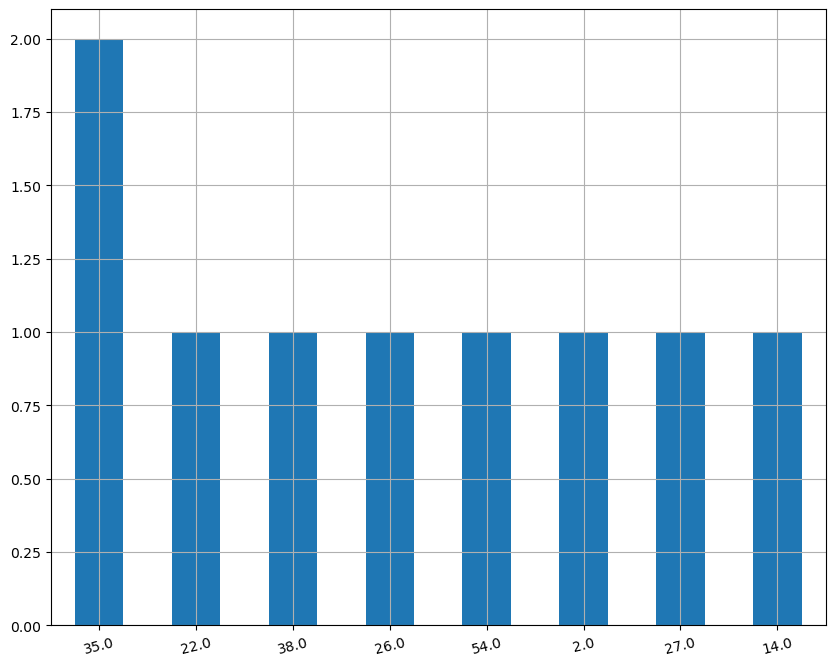

In [294]:
import matplotlib.pyplot as plt
CountStatus = pd.value_counts(train['Age'].values[:10], sort=True) # Age 열에서 처음 10개 값들을 카운트하여, 변수에 저장함.
CountStatus.plot.bar() 
CountStatus.plot.bar(grid=True, figsize=(10, 8), fontsize=10)
plt.xticks(rotation=14) # x축 눈금 라벨의 회전 각도를 14도로 설정함.


In [295]:
#ML
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [296]:
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891, 1), (418, 6))

In [300]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train).round(2)

C:\Users\tjxog\AppData\Local\Temp\ipykernel_14268\3334107570.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)


0.92

In [315]:
submission = pd.read_csv('./data/submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [320]:
submission = pd.read_csv('./data/submission.csv')
submission['Survived'] = Y_pred


In [329]:
# csv 파일로 쓰기
submission.head(10)
submission.to_csv('./data/titanic.csv', index=False)